# Reading the Dataset

In [1]:
import pandas as pd
df=pd.read_csv('osi1.csv')

# Importing useful Libraries

In [2]:
import numpy as np

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and stuff

In [3]:
df.shape

(200, 11)

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,OperatingSystems,Browser,Region,TrafficType
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,0.690000,25.545000,0.220000,10.870000,13.280000,563.830000,2.220000,1.90500,2.150000,2.700000,2.730000
std,1.819465,122.341634,1.260773,88.080041,18.241859,931.457345,11.955596,0.82424,1.336575,2.154812,1.197611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,41.750000,0.000000,1.00000,1.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,7.000000,256.500000,0.000000,2.00000,2.000000,2.000000,3.000000
75%,0.000000,0.000000,0.000000,0.000000,17.000000,632.000000,0.000000,2.00000,2.000000,3.000000,3.000000
max,12.000000,1226.000000,16.000000,1210.000000,128.000000,6952.000000,109.000000,4.00000,7.000000,9.000000,8.000000


In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,OperatingSystems,Browser,Region,TrafficType
0,0,0,0,0,1,0,0,1,1,1,1
1,0,0,0,0,2,64,0,2,2,1,2
2,0,0,0,0,1,0,0,4,1,9,3
3,0,0,0,0,2,3,0,3,2,2,4
4,0,0,0,0,10,628,0,3,3,1,4


In [6]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,OperatingSystems,Browser,Region,TrafficType
195,0,0,0,0,98,3557,0,1,1,1,3
196,2,56,1,144,67,2564,19,2,2,4,2
197,3,113,0,0,13,3014,0,2,2,1,2
198,0,0,0,0,17,840,109,2,2,9,2
199,3,94,2,125,55,1971,96,2,4,1,2


Text(0, 0.5, 'Count')

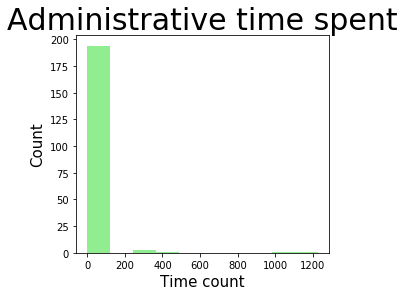

In [7]:
# visualizing the distribution of customers and time spent by them in Administrative area

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 2)
plt.hist(df['Administrative_Duration'], color = 'lightgreen')
plt.title('Administrative time spent',fontsize = 30)
plt.xlabel('Time count', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

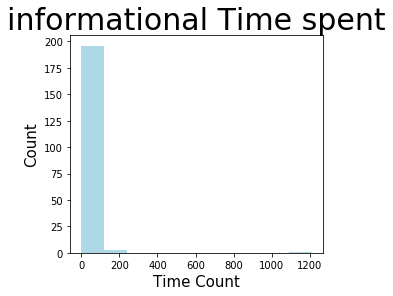

In [8]:
# visualizing the distribution of customers and time spent in Informational area

plt.subplot(1, 2, 2)
plt.hist(df['Informational_Duration'], color = 'lightblue')
plt.title('informational Time spent',fontsize = 30)
plt.xlabel('Time Count', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

# Perceptron 

In [21]:
import numpy as np
Xc=df.columns[0:]
X=df[Xc[1:11]].values
Y=df[Xc[10]].values
Y=Y.reshape(200,1)
print(X.shape)
print(Y.shape)
print(X[1:9])

(200, 10)
(200, 1)
[[  0   0   0   2  64   0   2   2   1   2]
 [  0   0   0   1   0   0   4   1   9   3]
 [  0   0   0   2   3   0   3   2   2   4]
 [  0   0   0  10 628   0   3   3   1   4]
 [  0   0   0  19 154   0   2   2   1   3]
 [  0   0   0   1   0   0   2   4   3   3]
 [  0   0   0   0   0   0   1   2   1   5]
 [  0   0   0   2  37   0   2   2   2   3]]


In [22]:
import numpy as np
import random
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=30):
        self.eta=eta # Learning rate (between 0.0 and 1.0)
        self.n_iter=n_iter  # Passes over the training dataset.
    def fit(self,X,y):  
        self.w_=np.random.random(1+X.shape[1])  
        for _ in range(self.n_iter):
            for xi, target in zip(X,y): 
                error=target-self.predict(xi)
                if error!=0:
                    update = self.eta * (target-self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update*1
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0, 1, 0)
ob=Perceptron(eta=0.01,n_iter=30)
ob.fit(X,Y)
print(ob.w_)


sum=0
for i in X:
    sum=sum+ob.net_input(i)
#print(sum)
avg=sum/200
print(avg)
#print(ob.predict([0,  0 , 0 , 2, 64  ,0  ,2,  2,  1,  2]))
#print(ob.predict([ 0 , 0 ,0  ,1 , 0 , 0  ,4  ,1,  9 , 3]))
res=ob.predict(X)

[1.04516041e+02 1.93138046e+03 4.56889383e+01 2.87935128e+03
 1.20706677e+03 5.40917939e+04 9.91395644e+01 2.01365281e+02
 2.15774193e+02 2.66420083e+02 3.69146622e+02]
30598150.95659433


In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(Y,res))

Accuracy:0.18


# SVM(Support Vector Machine)

In [24]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [25]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, np.ravel(y_train,order='C'))
y_pred=svm.predict(X_test)
#print('misclassified samples: %d' %(y_test!=y_pred).sum())#compute

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.97


# LVQ

In [27]:
import numpy as np
import random
#x=np.array([[0,0,1,1],[1,1,0,0]])
##x=X_train
#W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
#lr=0.6
#d=[0,0]
#e=1
##tar=y_train
def LVQ(x,tar):
    W=np.random.random((2,10))
    #W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
    lr=0.6
    d=[0,0]
    e=1
    while(e<=10):
      for i in range(x.shape[0]):
        for j in range(W.shape[0]):
          d[j]=np.sum((x[i,:]-W[j,:])**2)
          d[j]=d[j]**0.6
        #print(d)
        if(d[0]<d[1]):
          t=0
          #print("winning neuron is ",0)
        else:
          t=1
          #print("winning neuron is", 1)
        if(t==tar[i]):
          W[t,:]+=lr*(x[i,:]-W[t,:])
        else:
           W[t,:]-=lr*(x[i,:]-W[t,:])
      print("Updated weight at epoch ",e,"are ",W)
      e+=1
      lr=0.5*lr
    return W

In [28]:
W=LVQ(X_train,y_train)

Updated weight at epoch  1 are  [[-4.31885917e+14  7.35016239e+10  1.20929662e+12 -1.69781864e+14
  -4.57827319e+15  6.79238294e+12 -6.28500347e+12 -1.45832094e+13
  -1.37780408e+13 -1.33590954e+13]
 [-8.23028898e+12 -2.10765311e+12 -1.62747981e+14 -1.56127554e+13
  -1.30237236e+15  1.24988809e+11 -1.87940071e+10  1.21749690e+12
  -9.68756145e+11 -3.64328408e+12]]
Updated weight at epoch  2 are  [[-4.72461816e+20  8.04071384e+16  1.32291065e+18 -1.85732956e+20
  -5.00840425e+21  7.43053073e+18 -6.87548270e+18 -1.59533093e+19
  -1.50724947e+19 -1.46141892e+19]
 [-1.55867981e+19 -3.99154437e+18 -3.08217601e+20 -2.95679613e+19
  -2.46647659e+21  2.36708010e+17 -3.55927229e+16  2.30573659e+18
  -1.83466297e+18 -6.89977395e+18]]
Updated weight at epoch  3 are  [[-2.07127201e+24  3.52504794e+20  5.79963863e+21 -8.14253044e+23
  -2.19568380e+25  3.25754374e+22 -3.01421075e+22 -6.99392880e+22
  -6.60777978e+22 -6.40685869e+22]
 [-1.07349345e+23 -2.74905512e+22 -2.12275524e+24 -2.03640366e+23
 

In [29]:
#print(W)
def LVQt(X,Y,W):
    d=[0,0]
    res=np.zeros(Y.shape)
    for i in range(X.shape[0]):
        for j in range(W.shape[0]):
            d[j]=np.sum((X[i,:]-W[j,:])**2)
            d[j]=d[j]**0.6
        if d[0]<d[1]:
            res[i]=0
        elif d[0]==d[1]:
            res[i]=2
        else:
            res[i]=1
    return res
y_pred=LVQt(X_test,y_test,W)
#print(y_pred)
#print(y_test)
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))
print(y_pred)
print(y_test)

Accuracy:0.25
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[3]
 [4]
 [3]
 [7]
 [4]
 [1]
 [3]
 [1]
 [3]
 [1]
 [3]
 [3]
 [2]
 [1]
 [5]
 [5]
 [1]
 [2]
 [4]
 [3]
 [3]
 [3]
 [4]
 [3]
 [3]
 [3]
 [2]
 [1]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [5]
 [1]
 [1]
 [4]
 [1]
 [3]]


# SOM

In [30]:
import numpy as np
#x=np.array([[0,0,1,1],[1,1,0,0]])
def SOM(x,y):
    #W=np.array([[0.8,0.7,0.3,0.1,0.4],[0.1,0.3,0.2,0.1,0.1]])
    W=np.random.random((2,10))
    lr=0.6
    d=[0,0]
    e=1
    res=np.zeros(y.shape)
    while(e<=3):
      for i in range(x.shape[0]):
        for j in range(W.shape[0]):
          d[j]=np.sum((x[i,:]-W[j,:])**2)
          d[j]=d[j]**0.6
        print(d)
        if(d[0]<d[1]):
          t=0
          res[i]=0
          print("winning neuron is ",0)
        else:
          t=1
          res[i]=1
          print("winning neuron is", 1)
        W[t,:]+=lr*(x[i,:]-W[t,:])
      print("Updated weight at epoch ",e,"are ",W)
      e+=1
      lr=0.5*lr
    return res

In [31]:
y_pred=SOM(X,Y)

[2.1977073627209793, 2.35892336486046]
winning neuron is  0
[146.3011634627103, 144.84080104075318]
winning neuron is 1
[14.415377249027708, 83.10625124700692]
winning neuron is  0
[7.354161119053957, 73.55674516657291]
winning neuron is  0
[2270.2147016255867, 2110.6633185819423]
winning neuron is 1
[418.99789665733294, 713.3027712927869]
winning neuron is  0
[232.67953152468306, 1295.4192738086806]
winning neuron is  0
[78.07520627353591, 1295.4733451336485]
winning neuron is  0
[41.14816594726713, 1150.175959200664]
winning neuron is  0
[2638.733644710167, 1112.9329614663789]
winning neuron is 1
[1195.031119807247, 593.57966479329]
winning neuron is 1
[1247.0455561630988, 163.82375202254386]
winning neuron is 1
[764.7584862965159, 423.7754520953845]
winning neuron is 1
[163.7647429165667, 735.7363973899235]
winning neuron is  0
[5.59282024709379, 845.3415229694956]
winning neuron is  0
[6998.531360530757, 5587.063164475108]
winning neuron is 1
[160.68281894875503, 4651.527114141054]

In [32]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(Y,y_pred))

Accuracy:0.01
